<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Churn-Prediction" data-toc-modified-id="Churn-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Churn Prediction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Types-of-features" data-toc-modified-id="Types-of-features-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Types of features</a></span></li><li><span><a href="#Numerical-feature-analysis" data-toc-modified-id="Numerical-feature-analysis-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Numerical feature analysis</a></span></li><li><span><a href="#Categorical-feature-analysis" data-toc-modified-id="Categorical-feature-analysis-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Categorical feature analysis</a></span></li><li><span><a href="#Correlation-between-features" data-toc-modified-id="Correlation-between-features-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Correlation between features</a></span></li></ul></li></ul></li></ul></div>

# Churn Prediction

## Problem Statement

There is a telecom company that offers phone and internet services. There is a problem: some of our customers are churning. We would like to build a model that can identify the customers that are likely to churn. We have collected a dataset about our customers: what type of services they use, how much they paid, and how long they stayed with us. We also know who canceled their contracts and stopped using our services (churned). 

In this notebook, we are going to do exploratory data analysis.

## Imports

In [3]:
# usual imports 
import numpy as np
import pandas as pd

import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')

## Exploratory data analysis

In [4]:
%store -r df_train_full_explore
%store -r categorical_features
%store -r numerical_features

### Types of features

We have numerical and categorical features as mentioned below:

- numerical: tenure, monthlycharges, totalcharges
- categorical: gender, seniorcitizen, partner, dependents, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod

### Numerical feature analysis

We have three numerical features. We can analyze them using KDE plots. KDE plots depicts the probability density at different values in a continuous variable.

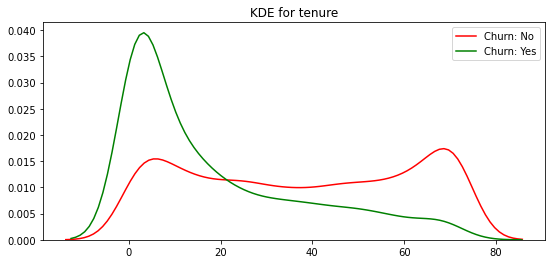

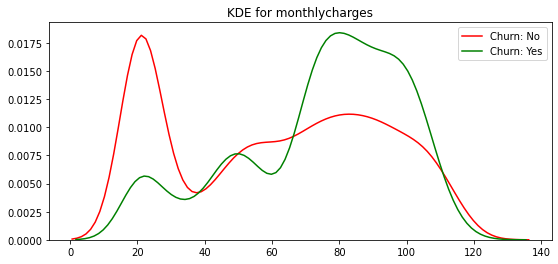

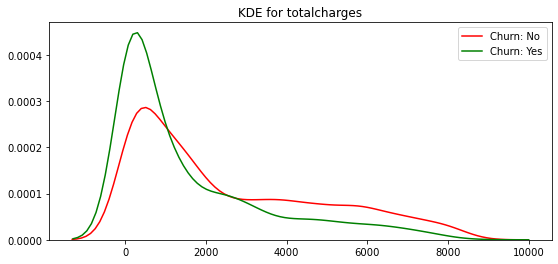

In [5]:
def kde_plot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df_train_full_explore[df_train_full_explore.churn == 0][feature], color= 'red', label= 'Churn: No')
    ax1 = sns.kdeplot(df_train_full_explore[df_train_full_explore.churn == 1][feature], color= 'green', label= 'Churn: Yes')

for feature in numerical_features:
    kde_plot(feature)

From above graphs, we can conclude following:
1. Customers with little tenure are more likely to churn
2. Customers with higher monthly charges are more likely to churn
3. It seems like tenure and monthly charges are important features as they are quite indicative of whether customer is going to churn or not.

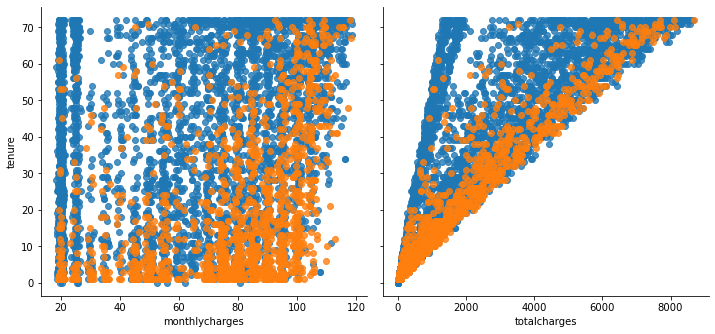

In [6]:
g = sns.PairGrid(df_train_full_explore, 
                 y_vars=["tenure"], 
                 x_vars=["monthlycharges", "totalcharges"], 
                 height=4.5, 
                 hue="churn", 
                 aspect=1.1
                )
# g = g.add_legend()
ax = g.map(plt.scatter, alpha=0.8)

Text(0.5, 0, 'Tenure groups')

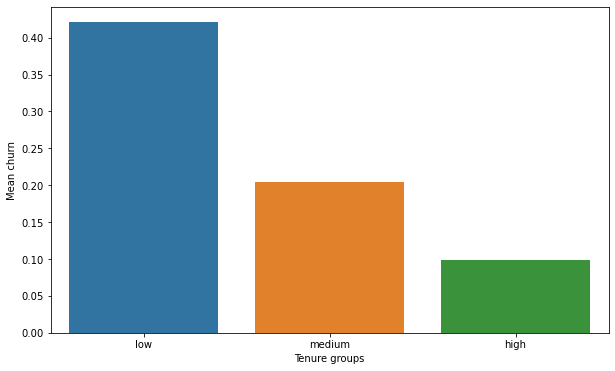

In [7]:
for col in numerical_features:
    df_train_full_explore[col +'_label'] = pd.cut(
        x = df_train_full_explore[col], bins = 3, labels= ['low', 'medium', 'high']
    )

df_group = df_train_full_explore.groupby(by= 'tenure_label').churn.agg(['mean'])

plt.figure(figsize=(10,6))
sns.barplot(x= list(df_group.index), y= df_group['mean'])

# Add label for vertical axis
plt.ylabel("Mean churn")
plt.xlabel("Tenure groups")

Text(0.5, 0, 'Monthly charges groups')

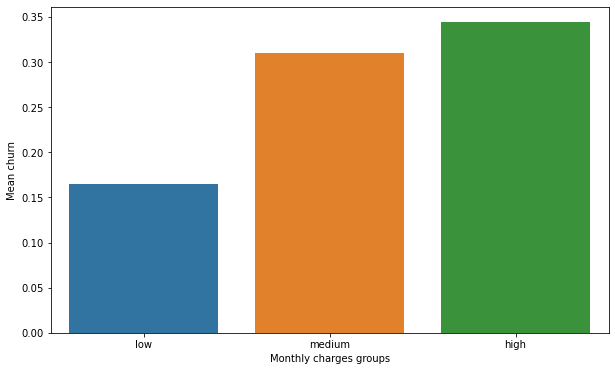

In [8]:
df_group = df_train_full_explore.groupby(by= 'monthlycharges_label').churn.agg(['mean'])

plt.figure(figsize=(10,6))
sns.barplot(x= list(df_group.index), y= df_group['mean'])
plt.ylabel("Mean churn")
plt.xlabel("Monthly charges groups")

Text(0.5, 0, 'Total charges groups')

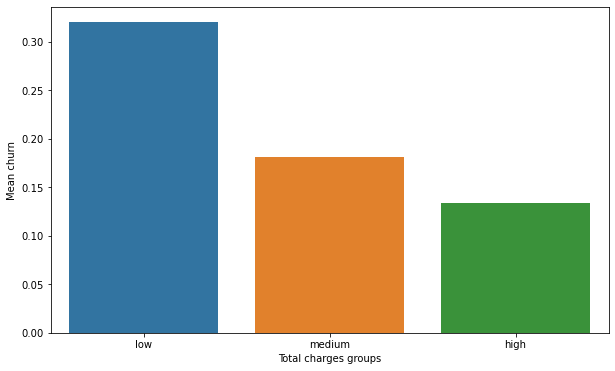

In [9]:
df_group = df_train_full_explore.groupby(by= 'totalcharges_label').churn.agg(['mean'])

plt.figure(figsize=(10,6))
sns.barplot(x= list(df_group.index), y= df_group['mean'])
plt.ylabel("Mean churn")
plt.xlabel("Total charges groups")

### Categorical feature analysis

We have 16 categorical features:
- 6 of these features are binary
- 9 of these features can have one of the 3 unique values
- 1 feature can take one of 4 unique values

In [10]:
categorical_features_unique_count_series = df_train_full_explore[categorical_features].nunique()
categorical_features_unique_count_series

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [11]:
from collections import defaultdict
type_of_cat_feature_to_count =  defaultdict(int)
for i in range(len(categorical_features_unique_count_series)):
    key = "{}_unique_value".format(categorical_features_unique_count_series[i])
    type_of_cat_feature_to_count[key] += 1
pd.Series(type_of_cat_feature_to_count)

2_unique_value    6
3_unique_value    9
4_unique_value    1
dtype: int64

**Senior citizen,  gender and age**

,seniorcitizen,churn,churn_count,percentage of customers
0,0,0,3578,0.635073
1,0,1,1144,0.203053
2,1,0,535,0.094959
3,1,1,377,0.066915


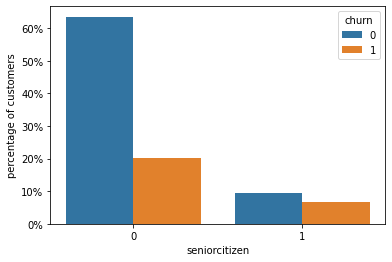

In [12]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    g = df_train_full_explore.groupby(feature)['churn'].value_counts().to_frame()
    g.columns = ['churn_count']
    g[axis_name] = g['churn_count'] / len(df_train_full_explore)
    g = g.reset_index()
    ax = sns.barplot(x=feature, y= axis_name, hue='churn', data=g, orient=orient)
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    ax.plot()
    return g

seniorcitizen_data = barplot_percentages('seniorcitizen')
seniorcitizen_data

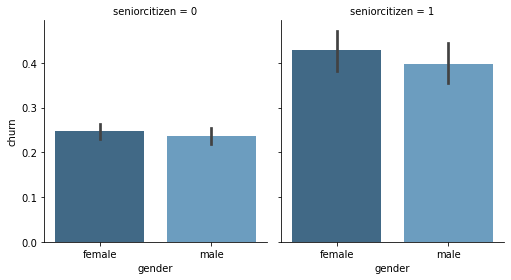

In [13]:
g = sns.FacetGrid(df_train_full_explore, col="seniorcitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn", palette = "Blues_d", order= ['female', 'male'])

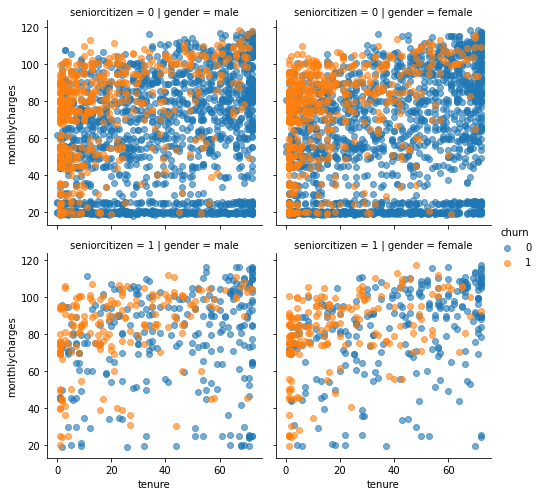

In [14]:
g = sns.FacetGrid(df_train_full_explore, row='seniorcitizen', col="gender", hue="churn", height=3.5)
g.map(plt.scatter, "tenure", "monthlycharges", alpha=0.6)
g.add_legend();

**Few observations**
- Gender is not a indicative feature of whether a customer would churn or not.
- Senior citizens are more likely to churn.
- There isn't any special relationship between numerical features and above discussed categorical variables.

**Partners and dependents**

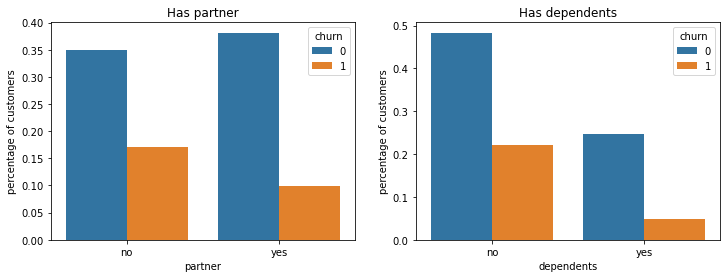

In [15]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df_train_full_explore.groupby('partner')["churn"].value_counts()/len(df_train_full_explore)
gp_partner = gp_partner.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='partner', y= axis_y, hue='churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df_train_full_explore.groupby('dependents')["churn"].value_counts()/len(df_train_full_explore)
gp_dep = gp_dep.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='dependents', y= axis_y, hue='churn', data=gp_dep, ax=axis[1])

**Few observations**
- Customers that don't have partners are more likely to churn
- Customers that don't have dependents are more likely to churn

**Phone and Internet services**

,multiplelines,churn,percentage of customers
0,no,0,0.355875
1,no,1,0.123358
2,no_phone_service,0,0.073660
3,no_phone_service,1,0.023429
4,yes,0,0.300497
5,yes,1,0.123181


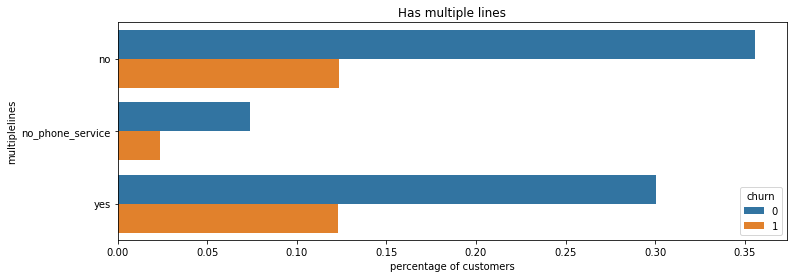

In [16]:
fig, axis = plt.subplots(1, 1, figsize=(12,4))
axis.set_title("Has multiple lines")
axis_y = "percentage of customers"
gp_multiplelines = df_train_full_explore.groupby('multiplelines')['churn'].value_counts()/len(df_train_full_explore)
gp_multiplelines = gp_multiplelines.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x=axis_y, y='multiplelines' , hue='churn', data=gp_multiplelines, ax=axis)
gp_multiplelines

**Observations**
- Very few customers have no phone service
- Customers with and without multiple lines have almost same churn rate. 

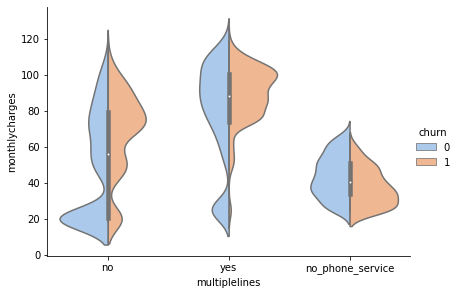

In [17]:
ax = sns.catplot(x="multiplelines", y="monthlycharges", hue="churn", kind="violin",
                 split=True, palette="pastel", data=df_train_full_explore, height=4.2, aspect=1.4)

**Internet services**

,internetservice,churn,percentage of customers
0,dsl,0,0.277245
1,dsl,1,0.066028
2,fiber_optic,0,0.252929
3,fiber_optic,1,0.187078
4,no,0,0.199858
5,no,1,0.016862


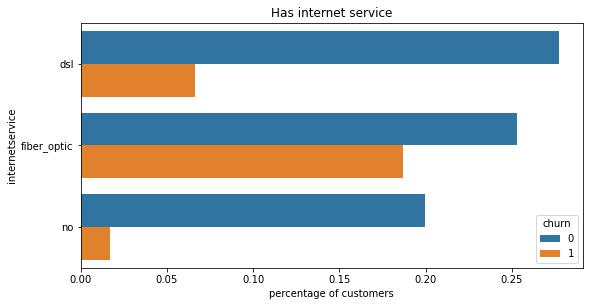

In [18]:
fig, axis = plt.subplots(1, 1, figsize=(9, 4.5))
axis.set_title("Has internet service")
axis_y = "percentage of customers"
gp_internetservice = df_train_full_explore.groupby('internetservice')['churn'].value_counts()/len(df_train_full_explore)
gp_internetservice = gp_internetservice.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x= axis_y, y= 'internetservice' , hue= 'churn', data= gp_internetservice, ax= axis)
gp_internetservice


- Customers with no internet service have very low churn rate
- Customers with fiber optic connection have very high churn rate

Analyzing monthly charges with internet services:

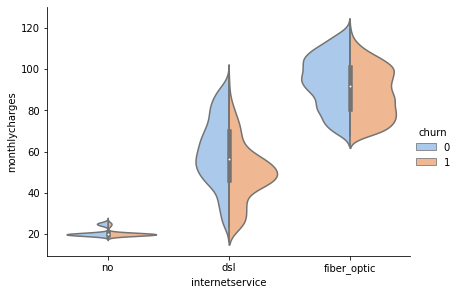

In [19]:
ax = sns.catplot(x="internetservice", y="monthlycharges", hue="churn", kind="violin",
                 split=True, palette="pastel", data=df_train_full_explore, height=4.2, aspect=1.4)

**Other internet related services**

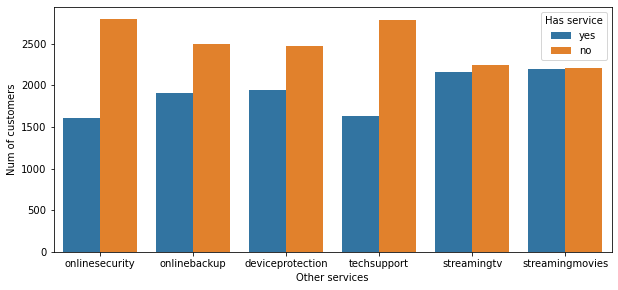

In [20]:
cols = ["onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies"]
df1 = pd.melt(df_train_full_explore[df_train_full_explore["internetservice"] != "no"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Other services', ylabel='Num of customers')
plt.show()

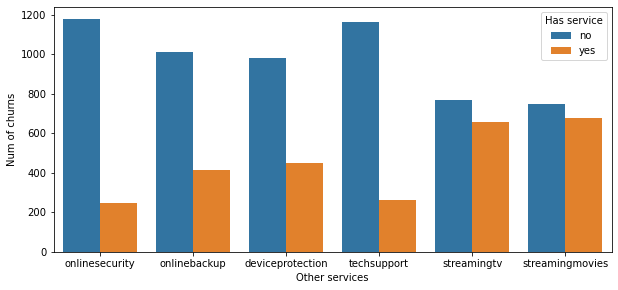

In [21]:
plt.figure(figsize=(10, 4.5))
df1 = df_train_full_explore[(df_train_full_explore.internetservice != "no") & (df_train_full_explore.churn == 1)]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['no', 'yes'])
ax.set(xlabel='Other services', ylabel='Num of churns')
plt.show()

- Streaming services are not indicative of churn
- Online security, online backup, device protection and tech support: Customers that opt for these 4 services are less likely to churn.

**Contract and Billing**

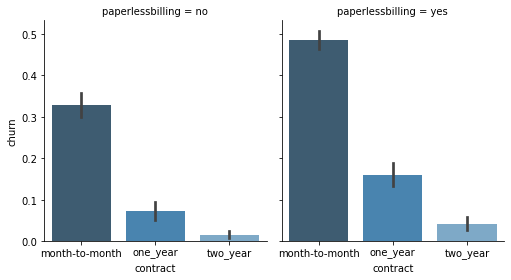

In [22]:
g = sns.FacetGrid(df_train_full_explore, col="paperlessbilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "contract", "churn", palette = "Blues_d", order= ['month-to-month', 'one_year', 'two_year'])

,paymentmethod,churn,percentage of customers
0,bank_transfer_(automatic),0,0.179979
1,bank_transfer_(automatic),1,0.036386
2,credit_card_(automatic),0,0.180511
3,credit_card_(automatic),1,0.035499
4,electronic_check,0,0.182819
5,electronic_check,1,0.153177
6,mailed_check,0,0.186723
7,mailed_check,1,0.044906


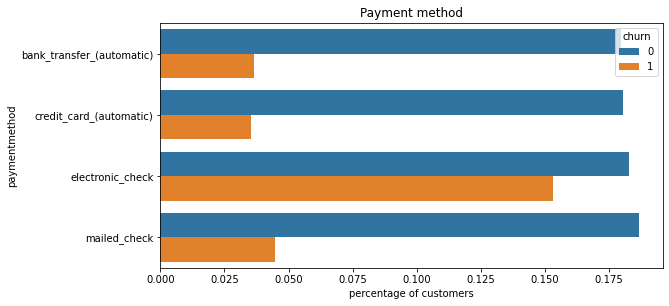

In [23]:
fig, axis = plt.subplots(1, 1, figsize=(9, 4.5))
axis.set_title("Payment method")
axis_y = "percentage of customers"
gp_paymentmethod = df_train_full_explore.groupby('paymentmethod')['churn'].value_counts()/len(df_train_full_explore)
gp_paymentmethod = gp_paymentmethod.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x= axis_y, y= 'paymentmethod' , hue= 'churn', data= gp_paymentmethod, ax= axis)
gp_paymentmethod

- Majority of customers use electronic check as a payment method. Large number of such customers churn as well
- Customers who opt for paperless billing churn more.
- Smaller contracts have higher churn rate.

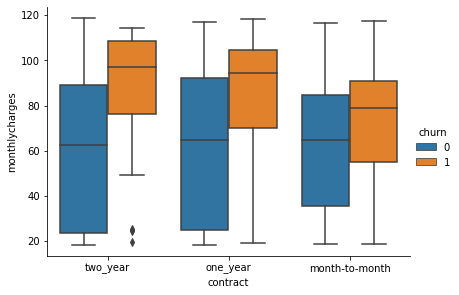

In [24]:
ax = sns.catplot(x="contract", y="monthlycharges", hue="churn", kind="box", data=df_train_full_explore, height=4.2, aspect=1.4)

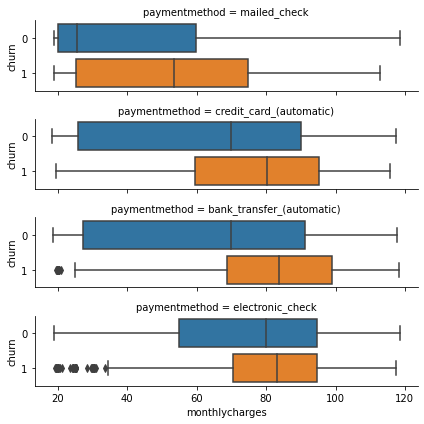

In [25]:
ax = sns.catplot(y="churn", 
                 x="monthlycharges", 
                 row="paymentmethod", 
                 kind="box", 
                 data=df_train_full_explore, 
                 height=1.5, 
                 aspect=4, 
                 orient='h')

- Mailed checks have lower charges
- When it comes to mailed check payment method, there is big difference in monthly charges for those who churn and those have not.